In [1]:
!pip install pandas scikit-learn nltk matplotlib seaborn


In [3]:
import pandas as pd
import zipfile
import requests
from io import BytesIO

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"

# Download and open the zip file
response = requests.get(url)
with zipfile.ZipFile(BytesIO(response.content)) as archive:
    with archive.open("SMSSpamCollection") as file:
        df = pd.read_csv(file, sep='\t', header=None, names=['label', 'message'])

df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Chat GPT used to find this specific SMS Spam Library

In [4]:
print("Dataset size:", df.shape)
print("\nClass distribution:")
print(df['label'].value_counts())

Dataset size: (5572, 2)

Class distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


In [5]:
print(df.isnull().sum())

label      0
message    0
dtype: int64


In [6]:
print("\nSample ‘spam’ messages:")
print(df[df['label'] == 'spam'].head()['message'])

print("\nSample ‘ham’ messages:")
print(df[df['label'] == 'ham'].head()['message'])


Sample ‘spam’ messages:
2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: message, dtype: object

Sample ‘ham’ messages:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: message, dtype: object


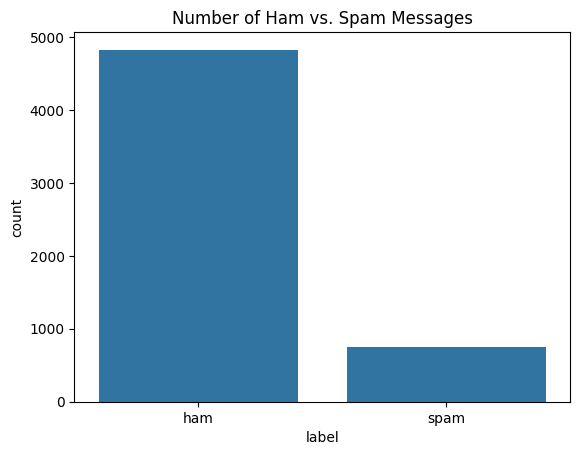

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='label')
plt.title('Number of Ham vs. Spam Messages')
plt.show()

In [8]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = "".join([char for char in text if char not in string.punctuation and not char.isdigit()])
    # Tokenize
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Join back to string
    return " ".join(tokens)

df['clean_message'] = df['message'].apply(clean_text)
print(df[['message', 'clean_message']].head())


                                             message  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                       clean_message  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry wkly comp win fa cup final tkts st ...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_message'])

print("Shape of the feature matrix:", X.shape)


Shape of the feature matrix: (5572, 8501)


In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = encoder.fit_transform(df['label'])

print("Sample encoded labels:", y[:5])  # Ham=0, Spam=1


Sample encoded labels: [0 0 1 0 0]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (4457, 8501)
Test set size: (1115, 8501)


In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9632286995515695
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.72      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9587443946188341
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       966
           1       1.00      0.69      0.82       149

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9748878923766816
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.97      0.97      1115



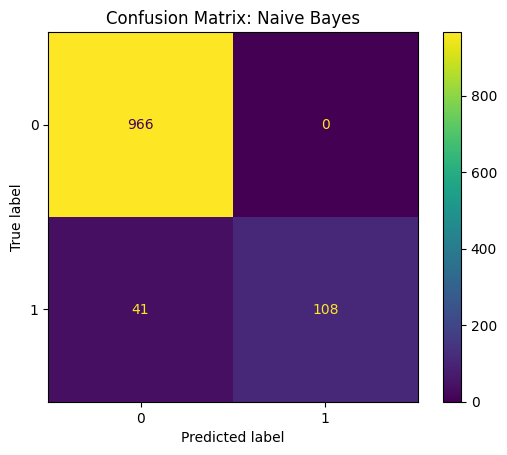

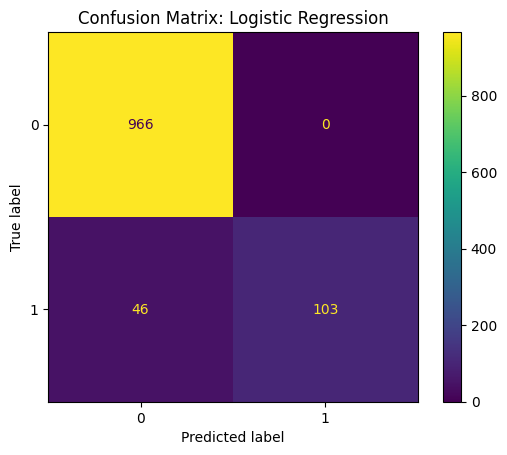

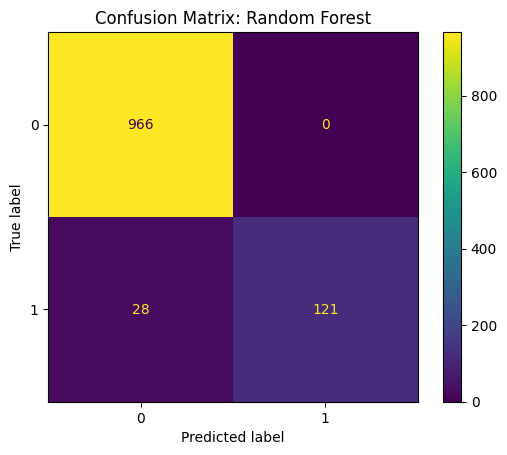

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

for model, y_pred, name in [
    (nb, y_pred_nb, "Naive Bayes"),
    (lr, y_pred_lr, "Logistic Regression"),
    (rf, y_pred_rf, "Random Forest"),
]:
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"Confusion Matrix: {name}")
    plt.show()


In [16]:
def predict_spam(message):
    cleaned = clean_text(message)
    features = vectorizer.transform([cleaned])
    pred = rf.predict(features)[0]
    return "spam" if pred == 1 else "ham"

# Example usage:
print(predict_spam("WIN a free prize now! Click here."))  # Likely "spam"
print(predict_spam("Let's meet for lunch tomorrow."))     # Likely "ham"


spam
ham
